In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/care4better/time_series/monthly-beer-production-in-austr.csv',index_col='Month',parse_dates=True)

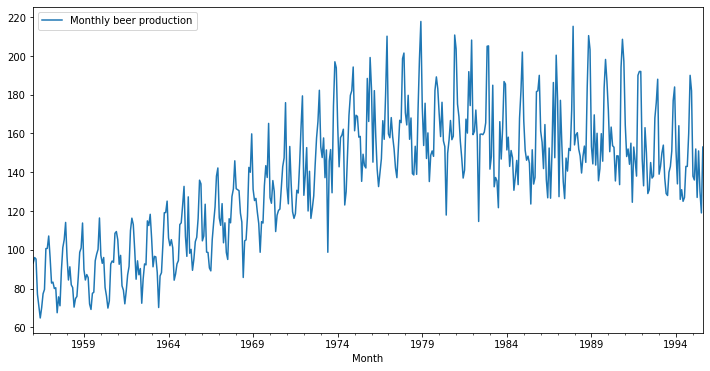

In [4]:

df.plot(figsize=(12,6))

In [ ]:
df

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [5]:
df=df.rename(columns={'Monthly beer production':'production'})

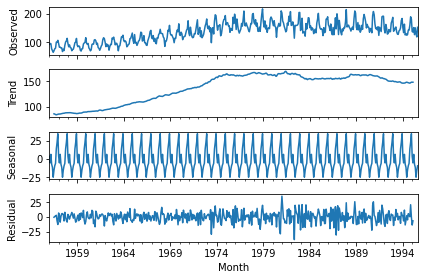

In [6]:
results = seasonal_decompose(df['production'])
results.plot();

In [7]:
train = df.iloc[:430]
test = df.iloc[431:]

In [8]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [47]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=4)

In [48]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.18562092 0.20392157 0.19869281 0.08039216 0.03986928 0.
 0.03464052 0.08169935 0.09607843 0.23398693 0.23464052 0.27647059
 0.20392157 0.19869281 0.08039216 0.03986928 0.         0.03464052
 0.08169935 0.09607843 0.23398693 0.23464052 0.27647059 0.20326797
 0.19869281 0.08039216 0.03986928 0.         0.03464052 0.08169935
 0.09607843 0.23398693 0.23464052 0.27647059 0.20326797 0.11764706
 0.08039216 0.03986928 0.         0.03464052 0.08169935 0.09607843
 0.23398693 0.23464052 0.27647059 0.20326797 0.11764706 0.12091503]
Predict this y: 
 [[0.20326797]
 [0.11764706]
 [0.12091503]
 [0.09934641]]


In [57]:
model = Sequential()
model.add(LSTM(100, activation='relu',return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(200, activation='relu',return_sequences=True))
model.add(LSTM(200, activation='relu',return_sequences=True))
model.add(LSTM(200, activation='relu',return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
es = EarlyStopping(monitor='loss')

In [58]:
model.fit(generator,epochs=100)

Epoch 1/100
105/105 [==============================] - 14s 82ms/step - loss: 0.0491
Epoch 2/100
105/105 [==============================] - 9s 83ms/step - loss: 0.0173
Epoch 3/100
105/105 [==============================] - 9s 84ms/step - loss: 0.0165
Epoch 4/100
105/105 [==============================] - 9s 85ms/step - loss: 0.0137
Epoch 5/100
105/105 [==============================] - 9s 84ms/step - loss: 0.0134
Epoch 6/100
105/105 [==============================] - 9s 84ms/step - loss: 0.0125
Epoch 7/100
105/105 [==============================] - 9s 85ms/step - loss: 0.0113
Epoch 8/100
105/105 [==============================] - 9s 86ms/step - loss: 0.0107
Epoch 9/100
105/105 [==============================] - 9s 85ms/step - loss: 0.0099
Epoch 10/100
105/105 [==============================] - 9s 84ms/step - loss: 0.0107
Epoch 11/100
105/105 [==============================] - 9s 82ms/step - loss: 0.0110
Epoch 12/100
105/105 [==============================] - 9s 81ms/step - loss: 0.0084


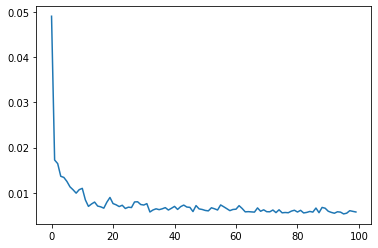

In [59]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [60]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [61]:
test_predictions

[array([0.78554094], dtype=float32),
 array([0.7170727], dtype=float32),
 array([0.5578589], dtype=float32),
 array([0.5107879], dtype=float32),
 array([0.51392066], dtype=float32),
 array([0.4996714], dtype=float32),
 array([0.5058937], dtype=float32),
 array([0.43131435], dtype=float32),
 array([0.5153309], dtype=float32),
 array([0.49444777], dtype=float32),
 array([0.5192396], dtype=float32),
 array([0.70813364], dtype=float32),
 array([0.68113834], dtype=float32),
 array([0.60424346], dtype=float32),
 array([0.50895596], dtype=float32),
 array([0.4818775], dtype=float32),
 array([0.48043442], dtype=float32),
 array([0.47338682], dtype=float32),
 array([0.45691544], dtype=float32),
 array([0.4358285], dtype=float32),
 array([0.4790737], dtype=float32),
 array([0.47581476], dtype=float32),
 array([0.52225053], dtype=float32),
 array([0.6247248], dtype=float32),
 array([0.5963849], dtype=float32),
 array([0.5348777], dtype=float32),
 array([0.474456], dtype=float32),
 array([0.456451

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
test

,production,Predictions
Month,,
1991-12-01,192.0,188.349480
1992-01-01,147.0,182.724730
1992-02-01,133.0,155.882180
1992-03-01,163.0,147.706037
1992-04-01,150.0,149.173065
1992-05-01,129.0,145.433300
1992-06-01,131.0,149.346254
1992-07-01,145.0,137.502745
1992-08-01,137.0,149.098157


Visualizing Test Dataset

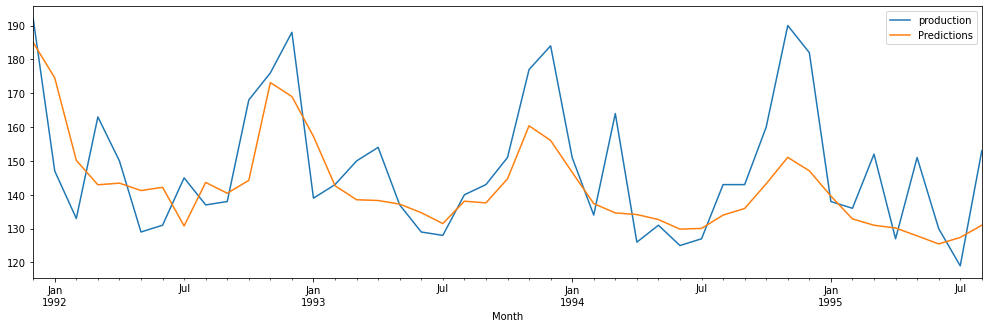

In [63]:
test.plot(figsize=(17,5))


# Predicting Future Values

predicting next 20 months

In [64]:
future_predictions = []


first_batch = scaled_test[-n_input:]
running_batch = first_batch.reshape((1, n_input, n_features))

for i in range(20):
    
    # get the prediction value for the first batch
    pred = model.predict(running_batch)[0]
    
    # append the prediction into the array
    future_predictions.append(pred) 
    
    # use the prediction to update the batch and remove the first value
    running_batch = np.append(running_batch[:,1:,:],[[current_pred]],axis=1)

In [65]:
future_predictions = scaler.inverse_transform(future_predictions)
future_predictions

array([[142.9123386 ],
       [156.67300533],
       [174.28079234],
       [160.76816719],
       [133.88052117],
       [136.73714404],
       [141.02725368],
       [131.87762128],
       [140.81522505],
       [124.13707184],
       [127.66344069],
       [142.43995707],
       [127.28229074],
       [127.28229074],
       [127.28229074],
       [127.28229074],
       [127.28229074],
       [127.28229074],
       [127.28229074],
       [127.28229074]])

In [66]:
future_predictions=pd.DataFrame(future_predictions, columns=['Predictions'])
future_dates = pd.date_range('1995-09-01','1997-04-01',freq='MS')

In [67]:

future_pred = pd.DataFrame(columns=['Month','Productions'])
future_pred['Month']= future_dates
future_pred['Productions']= future_predictions
future_pred=future_pred.set_index('Month')
future_pred


,Productions
Month,
1995-09-01,142.912339
1995-10-01,156.673005
1995-11-01,174.280792
1995-12-01,160.768167
1996-01-01,133.880521
1996-02-01,136.737144
1996-03-01,141.027254
1996-04-01,131.877621
1996-05-01,140.815225


Visual Representation of 20 months prediction

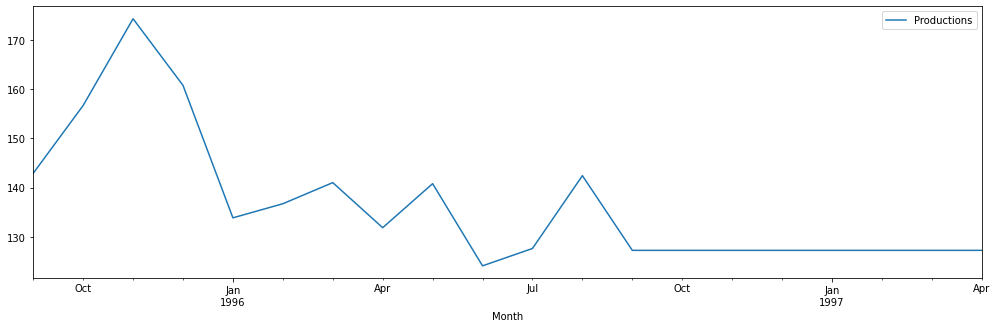

In [69]:
future_pred.plot(figsize=(17,5))